# Importing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans 



In [2]:
df =pd.read_csv('/Users/nursahkurt/Desktop/Moosic/data/df_audio_features_5000.csv',
                                 index_col=[0,1])

df.rename(columns=lambda x: x.strip(), inplace=True)
df.drop(['id','html','type','mode','duration_ms','time_signature','key','loudness','speechiness'], axis=1, inplace=True)

df

,,danceability,energy,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,0.694,0.000059,0.9750,0.3060,110.376
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,0.217,0.000002,0.1070,0.6930,125.039
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,0.453,0.000063,0.1240,0.9050,93.698
Mulher Eu Sei,Chico César,0.7050,0.05020,0.879,0.000041,0.3860,0.5240,106.802
Rosa Morena,Kurt Elling,0.6510,0.11900,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,0.917,0.715000,0.0832,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,0.855,0.426000,0.0694,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,0.951,0.969000,0.0772,0.0344,71.573


## Exploration of different scaling methods

## Range scaling

In [3]:
def range_scaler(col, min_value, max_value): 
    min_col = min_value
    max_col = max_value
    norm_val = []
    for val in col:
        norm_val.append((val - min_col) / (max_col - min_col))
    return norm_val

var_ranges = {'danceability': (0,1), 'energy': (0,1),
       'liveness': (0,1), 'acousticness': (0,1), 'instrumentalness': (0,1), 'liveness': (0,1),
       'valence': (0,1)}

def range_scale_df(df):
    
    cols = df.columns
    scaled_cols = {}

    for col in cols:
        if col in var_ranges.keys():
            scaled_cols[col] = range_scaler(df[col], var_ranges[col][0], var_ranges[col][1])
        else:
            min_max_scaler = MinMaxScaler(feature_range= (0, 1))
            min_max_scaler.fit(df[[col]])
            scaled_cols[col] = list(min_max_scaler.transform(df[[col]]))
    
    features_only_range_scaled = pd.DataFrame(scaled_cols)
    return features_only_range_scaled

In [4]:
range_scaled = range_scale_df(df)
range_scaled['tempo'] = range_scaled['tempo'].astype('float64')


## Min max scaling

In [5]:
min_max_scaler = MinMaxScaler(feature_range= (0, 1))
min_max_scaler.fit(df)
df_min_max_scaled = min_max_scaler.transform(df)

min_max_scaled = pd.DataFrame(df_min_max_scaled,
                                index= df.index,
                                columns= df.columns)

## Standard scaling

In [6]:
standard_scaler = StandardScaler()
standard_scaler.fit(df)
df_standard_scaled = standard_scaler.transform(df)

standard_scaled = pd.DataFrame(df_standard_scaled,
                                index= df.index,
                                columns= df.columns)

## Robust scaling

In [7]:
robust_scaler = RobustScaler()
robust_scaler.fit(df)
df_robust_scaled = robust_scaler.transform(df)

robust_scaled = pd.DataFrame(df_robust_scaled,
                                index= df.index,
                                columns= df.columns)

## Quantile Transforming

In [8]:
qt = QuantileTransformer(n_quantiles=10)
qt.fit(df)
df_quantile_transformed = qt.transform(df)

quantile_transformed = pd.DataFrame(df_quantile_transformed,
                                index= df.index,
                                columns= df.columns)

## Visulazing different methods

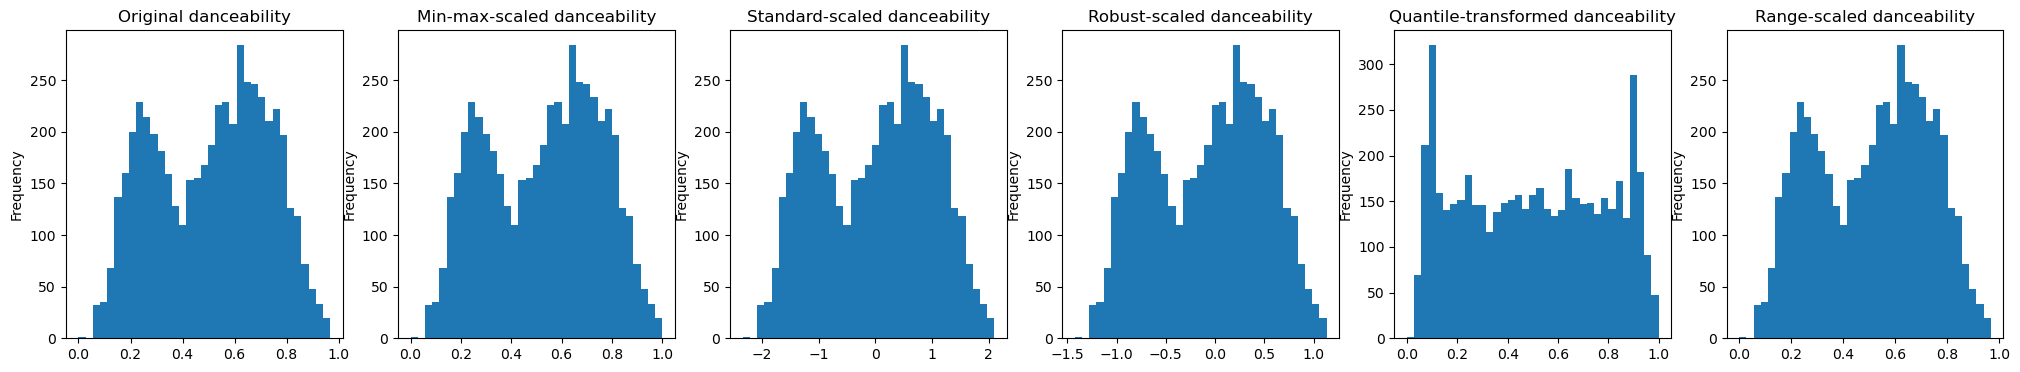

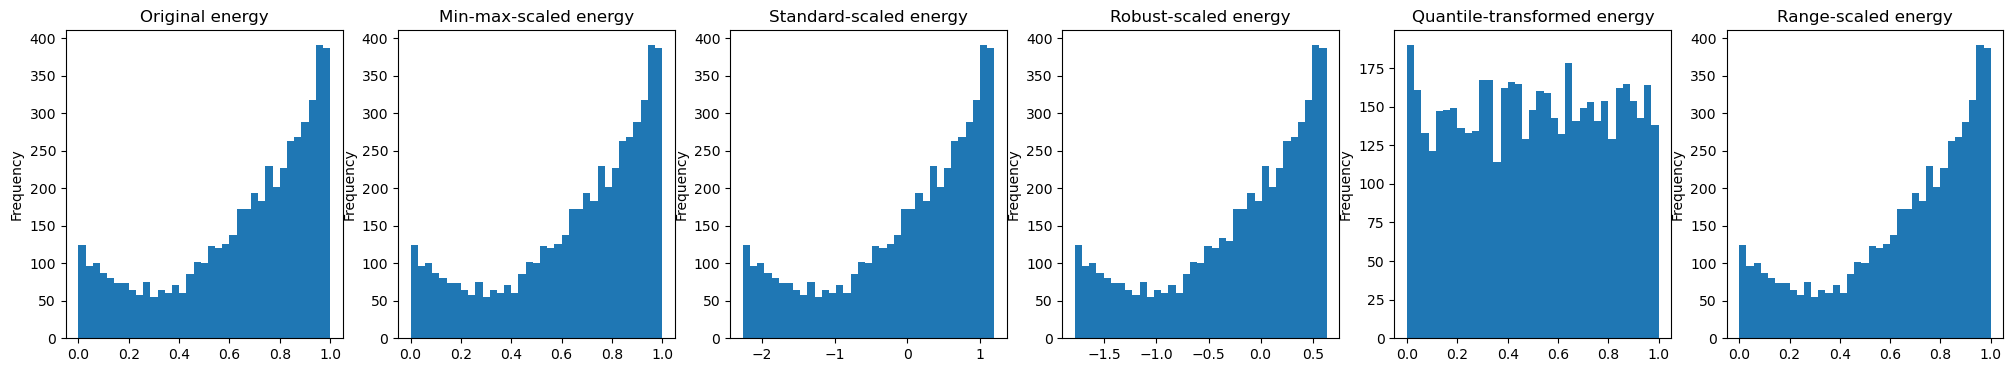

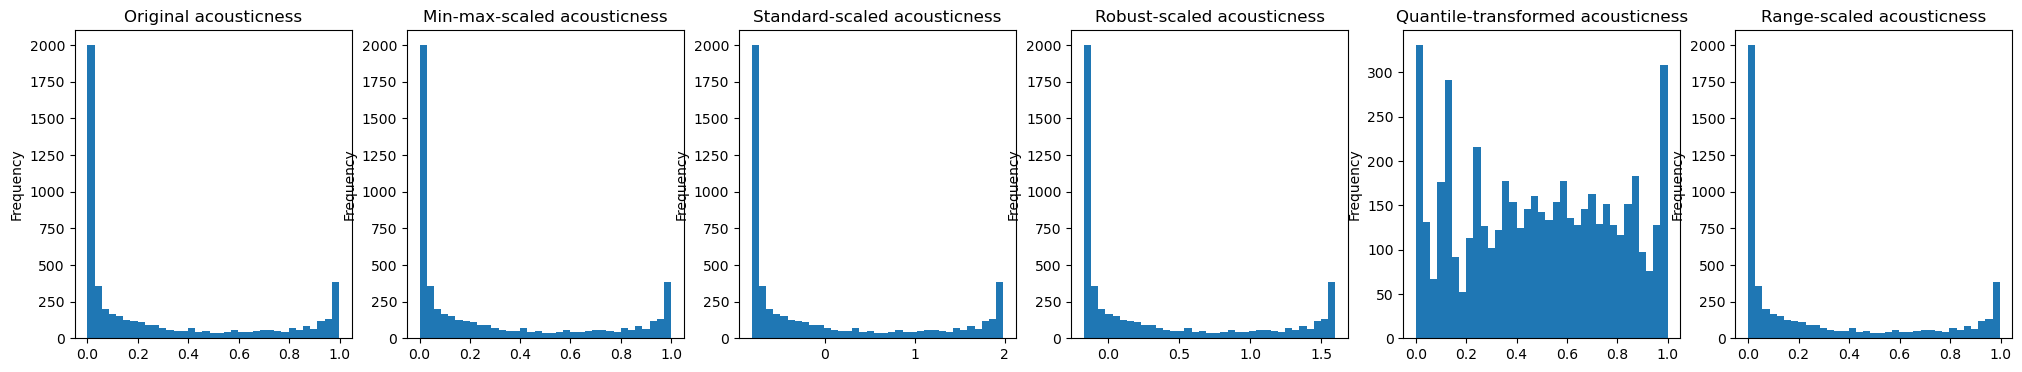

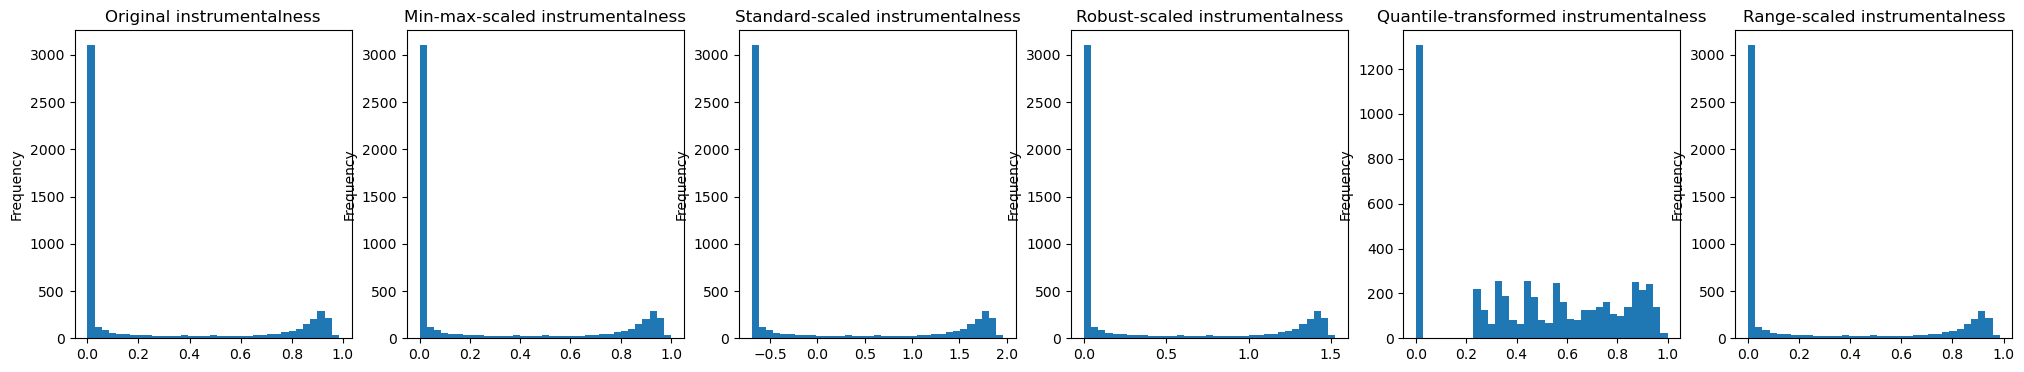

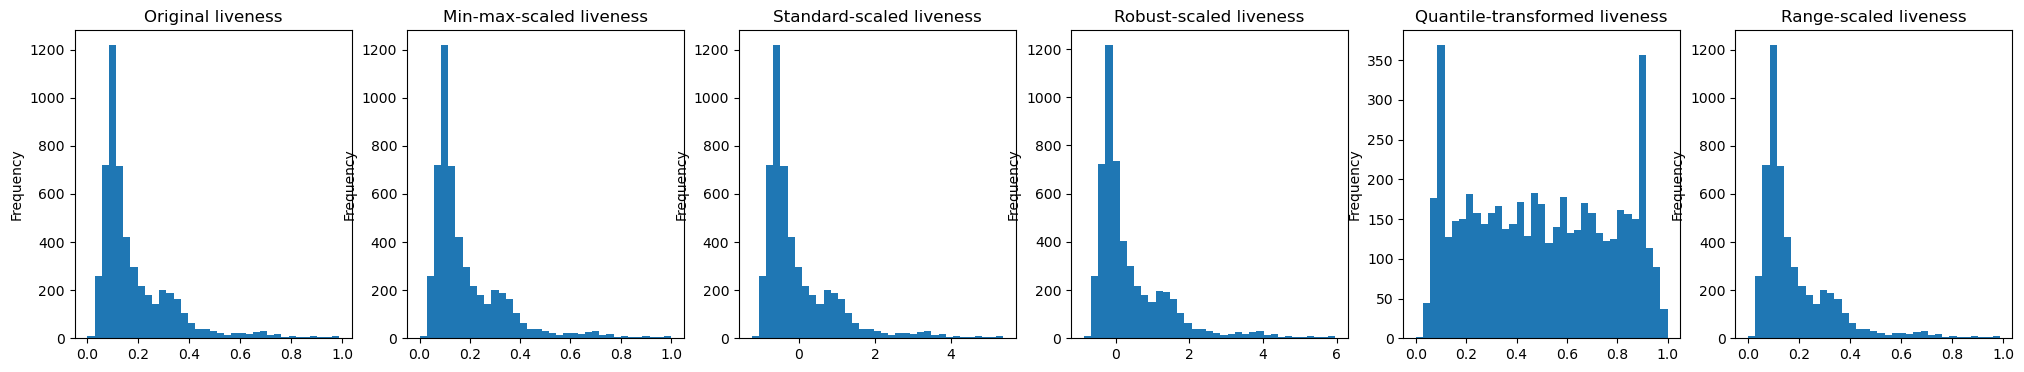

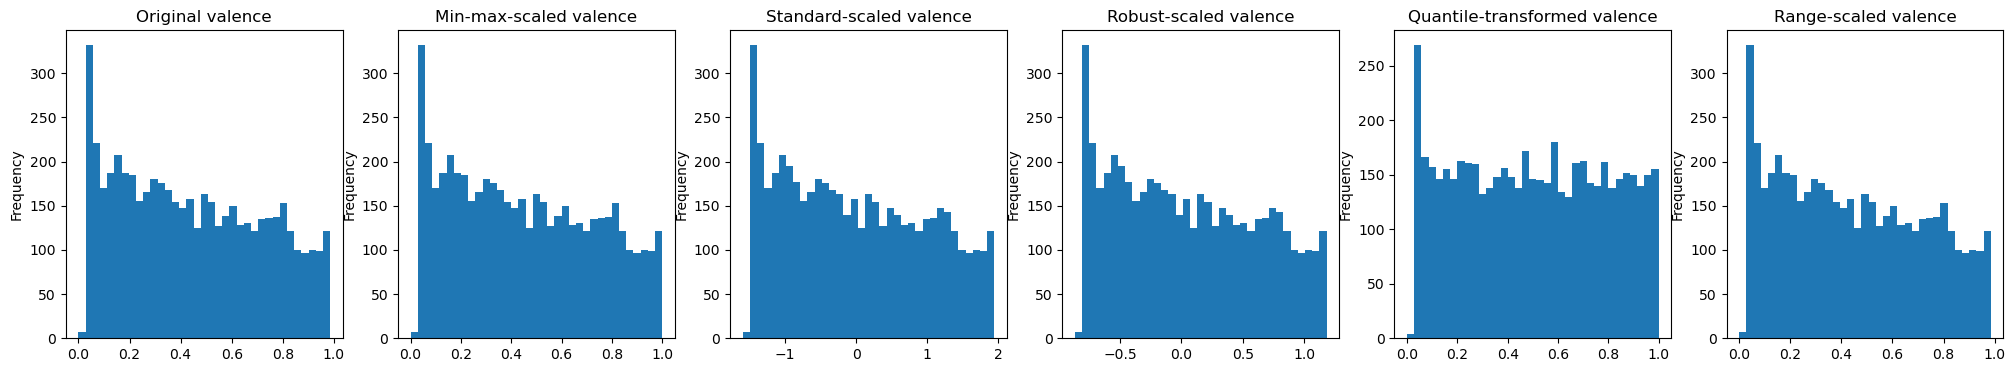

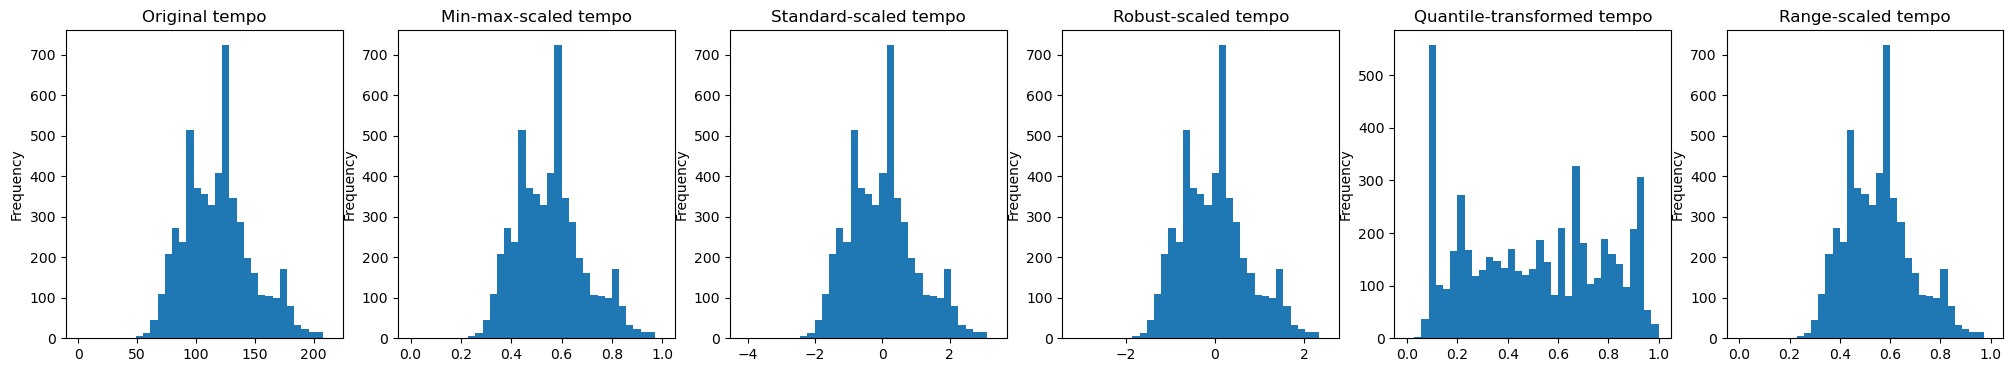

In [9]:
for var in df.columns:
    plt.figure(figsize=(25, 4))
    
    # plot original data
    plt.subplot(1, 6, 1)
    df[var].plot.hist(bins=35)
    plt.title(f"Original {var}")
    
    # plot min-max scaled data
    plt.subplot(1, 6, 2)
    min_max_scaled[var].plot.hist(bins=35)
    plt.title(f"Min-max-scaled {var}")

    # plot standard scaled data
    plt.subplot(1, 6, 3)
    standard_scaled[var].plot.hist(bins=35)
    plt.title(f"Standard-scaled {var}")

    # plot robust scaled data
    plt.subplot(1, 6, 4)
    robust_scaled[var].plot.hist(bins=35)
    plt.title(f"Robust-scaled {var}")

    # plot quantile transformed data
    plt.subplot(1, 6, 5)
    quantile_transformed[var].plot.hist(bins=35)
    plt.title(f"Quantile-transformed {var}")

     # plot range-scaled data
    plt.subplot(1, 6, 6)
    range_scaled[var].plot.hist(bins=35)
    plt.title(f"Range-scaled {var}")
    
    # show all plots
    plt.show()

# K_Means

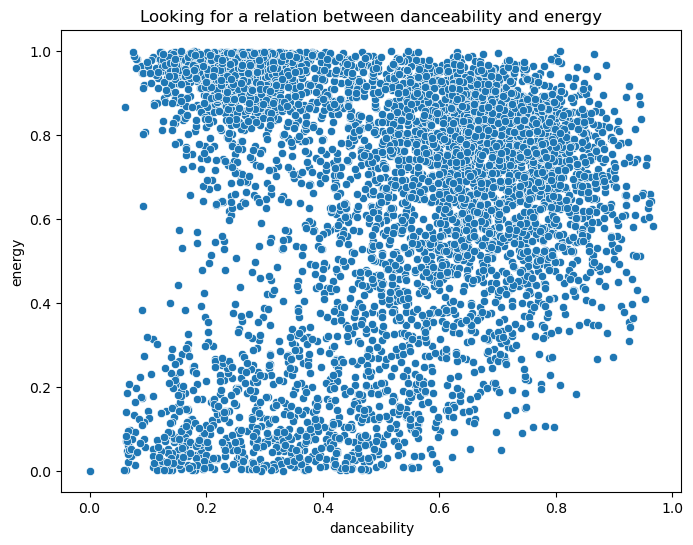

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='danceability', y='energy')
plt.title('Looking for a relation between danceability and energy')
plt.show()

In [11]:
df_cl = df[['danceability','energy']]
df_cl

,,danceability,energy
name,artist,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000
Mulher Eu Sei,Chico César,0.7050,0.05020
Rosa Morena,Kurt Elling,0.6510,0.11900
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093


In [12]:
df_cl.describe()

,danceability,energy
count,5235.000000,5235.000000
mean,0.509503,0.653565
std,0.218041,0.288335
min,0.000000,0.000000
25%,0.309000,0.479000
50%,0.539000,0.738000
75%,0.688000,0.893000
max,0.967000,1.000000


In [13]:
from sklearn.preprocessing import MinMaxScaler
df_cl_norm = MinMaxScaler().fit_transform(df_cl)

df_cl_norm = pd.DataFrame(df_cl_norm)
df_cl_norm.columns = ['danceability','energy']
df_cl_norm[:5]

,danceability,energy
0,0.680455,0.2590
1,0.767322,0.3990
2,0.880041,0.7300
3,0.729059,0.0502
4,0.673216,0.1190


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 4)

kmeans.fit(df_cl_norm)

/Users/nursahkurt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [15]:
kmeans.cluster_centers_

array([[0.34369666, 0.1433625 ],
       [0.28832524, 0.90549856],
       [0.66751915, 0.49256621],
       [0.70492574, 0.80452747]])

In [16]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['danceability','energy']
cl_pos

,danceability,energy
0,0.343697,0.143363
1,0.288325,0.905499
2,0.667519,0.492566
3,0.704926,0.804527


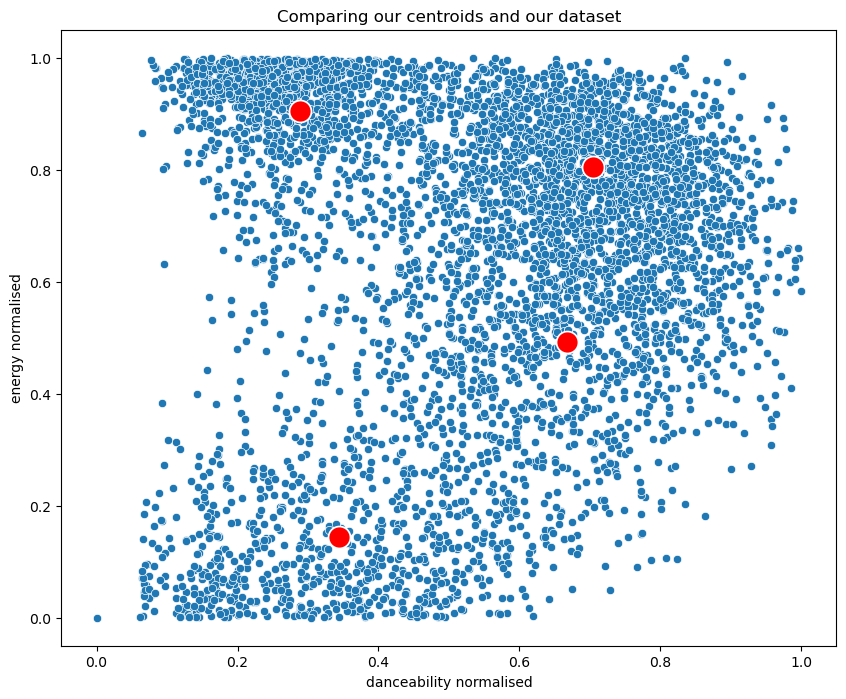

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(df_cl_norm)
plot_data.columns = ['danceability','energy']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('danceability normalised')
plt.ylabel('energy normalised')
sns.scatterplot(data=plot_data, x='danceability', y='energy')
sns.scatterplot(data=cl_pos, x='danceability', y='energy', color='red', s=250)
plt.show()

In [18]:
df['cluster'] = kmeans.labels_
df.sample(5)

,,danceability,energy,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,artist,,,,,,,,
Black White Felt,Roedelius,0.0643,0.0704,0.654,0.767000,0.0886,0.0674,65.582,0
A Lake,Emily A. Sprague,0.2040,0.3540,0.945,0.876000,0.1160,0.0373,85.497,0
(We're Gonna) Rock Around The Clock,Bill Haley & His Comets,0.8110,0.8590,0.205,0.000004,0.0761,0.7840,90.686,3
A Real Hero,College & Electric Youth,0.7190,0.4310,0.834,0.739000,0.1450,0.3780,112.004,2
Rude Boy,Rihanna,0.5630,0.7500,0.113,0.000000,0.0788,0.8120,173.906,3


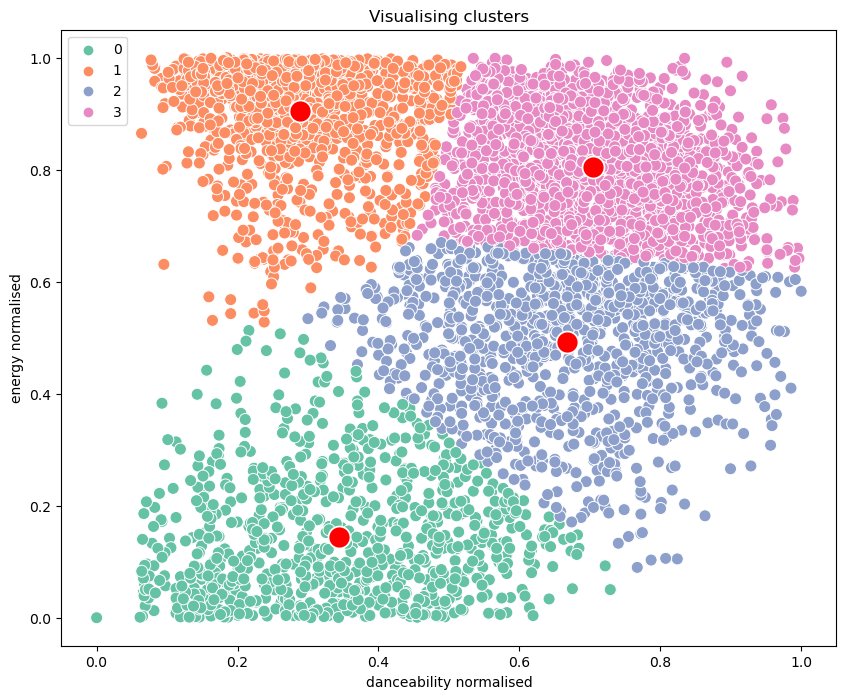

In [19]:
# create plot dataframe
plot_data = pd.DataFrame(df_cl_norm)
plot_data.columns = ['danceability','energy']
plot_data['cluster'] = kmeans.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('danceability normalised')
plt.ylabel('energy normalised')

# scatter plot
sns.scatterplot(data=plot_data, x='danceability', y='energy', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='danceability', y='energy', color='red', s=250)
plt.show()

## 2nd iteration

In [20]:
df_cl_all = df[['danceability','acousticness','instrumentalness','liveness','valence','tempo']]
df_cl_all.head()

,,danceability,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.694,0.000059,0.975,0.306,110.376
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.217,0.000002,0.107,0.693,125.039
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.453,0.000063,0.124,0.905,93.698
Mulher Eu Sei,Chico César,0.705,0.879,0.000041,0.386,0.524,106.802
Rosa Morena,Kurt Elling,0.651,0.916,0.000343,0.104,0.402,120.941


In [21]:
df_cl_all_norm = MinMaxScaler().fit_transform(df_cl_all)

kmeans_all = KMeans(n_clusters=4)
kmeans_all.fit(df_cl_all_norm)

/Users/nursahkurt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [22]:
kmeans_all.cluster_centers_

array([[0.56187837, 0.72472679, 0.03359595, 0.19378986, 0.52238523,
        0.54315846],
       [0.63362088, 0.10115079, 0.02374459, 0.19084488, 0.5565683 ,
        0.56635382],
       [0.31441933, 0.01867628, 0.75788855, 0.20481339, 0.25680574,
        0.57209098],
       [0.3366438 , 0.9377977 , 0.87412348, 0.13699859, 0.17501105,
        0.49186503]])

## Spider Plot

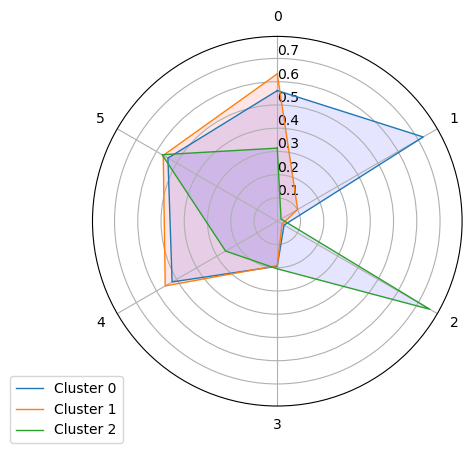

In [24]:
# Source: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
# Libraries
from math import pi
 
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [25]:
radar_df

,cluster,0,1,2,3,4,5
0,0,0.561878,0.724727,0.033596,0.193790,0.522385,0.543158
1,1,0.633621,0.101151,0.023745,0.190845,0.556568,0.566354
2,2,0.314419,0.018676,0.757889,0.204813,0.256806,0.572091
3,3,0.336644,0.937798,0.874123,0.136999,0.175011,0.491865


In [26]:
df[['cluster']].sample(10)

,,cluster
name,artist,
In the Ghetto,Elvis Presley,2
Love Will Keep Us Together,Captain & Tennille,2
Take on Me,a-ha,3
Follow You Follow Me - Remastered 2007,Genesis,3
Blue Moon,Billie Holiday,2
Weck mich auf,Samy Deluxe,3
Writer's Block (feat. Eminem),"Royce Da 5'9""",3
Every Breath You Take,The Police,2
Nasty Ways (feat. Lorreia Loushy),Dillinja,3


In [27]:
columns = ['danceability', 'energy']

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = columns
centroids

,danceability,energy
0,0.343697,0.143363
1,0.288325,0.905499
2,0.667519,0.492566
3,0.704926,0.804527


In [ ]:
#plot_data = pd.DataFrame(df_cl_norm)
#plot_data.columns = columns
#plot_data['cluster'] = kmeans.labels_#peng_kmeans.predict(peng_norm)
#plot_data.head()

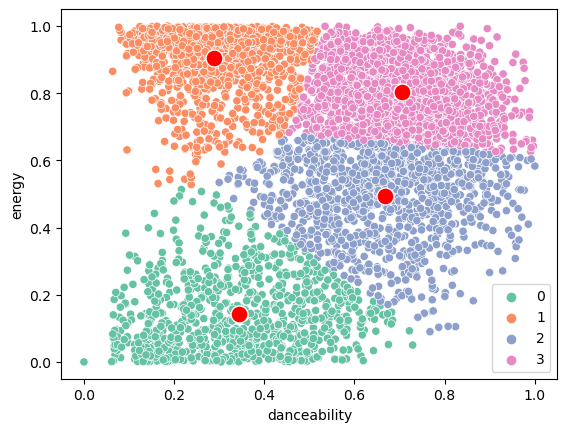

In [28]:
sns.scatterplot(data=plot_data, x='danceability', y='energy', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='energy', color='red', s=150)
plt.show()

In [29]:
centroids

,danceability,energy
0,0.343697,0.143363
1,0.288325,0.905499
2,0.667519,0.492566
3,0.704926,0.804527


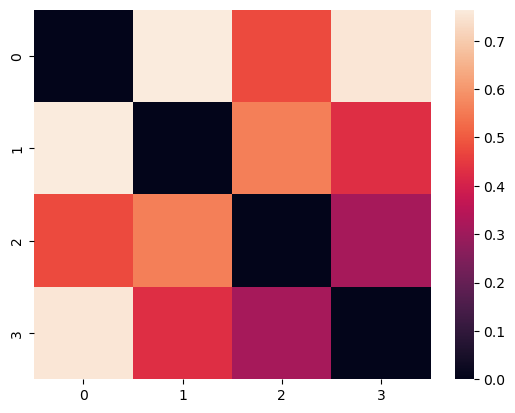

In [30]:
def manhattan_distance(data, student, student_to_compare):
    distance = (
        pd.DataFrame({
            'student_1':data.loc[student,:],
            'student_2':data.loc[student_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: abs(x.student_1 - x.student_2))
        .agg({'dist_abs':'sum'})[0]
    )
    return distance

def euclidean_distance(data, student, student_to_compare):
    distance = (
        pd.DataFrame({
            'student_1':data.loc[student,:],
            'student_2':data.loc[student_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: (x.student_1 - x.student_2)**2)
        .agg({'dist_abs':'sum'})[0]**0.5
    )
    return distance


def get_distances(data, distance_type='euclidean'):
    """
    Given a dataframe, return the distance between all the indexes.
    We assume the indexes represents the users/students.
    Args:
        * dataset
        * distance type to perform the operation (euclidean or manhattan)
    """
    if distance_type == 'manhattan':
        distances = [[manhattan_distance(data, student, student_to_compare) for student in data.index] for student_to_compare in data.index]
    else:
        distances = [[euclidean_distance(data, student, student_to_compare) for student in data.index] for student_to_compare in data.index]

    return pd.DataFrame(distances, columns=data.index, index=data.index)


sns.heatmap(get_distances(centroids))
plt.show()

/Users/nursahkurt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


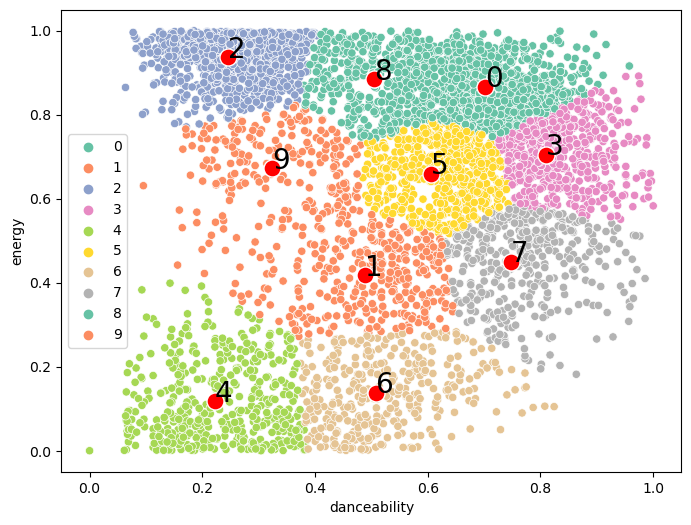

In [33]:
temp_kmeans = KMeans(n_clusters=10).fit(df_cl)

centroids_temp = pd.DataFrame(temp_kmeans.cluster_centers_)
centroids_temp.columns = columns
centroids_temp['cluster_name'] = centroids_temp.index

plot_data['cluster'] = temp_kmeans.labels_

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=plot_data, x='danceability', y='energy', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_temp, x='danceability', y='energy', color='red', s=150)
for i in range(centroids_temp.shape[0]):
    plt.text(
        x=centroids_temp['danceability'][i],
        y=centroids_temp['energy'][i],
        s=centroids_temp['cluster_name'][i],
        size=20
    )
plt.show()

dist_temp = get_distances(centroids_temp.drop('cluster_name', axis=1))

<Axes: >

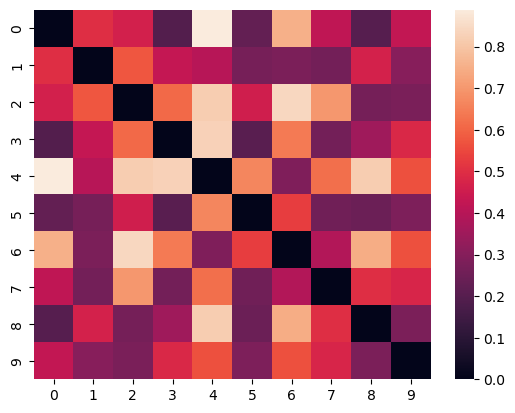

In [34]:
sns.heatmap(dist_temp)

## inertia

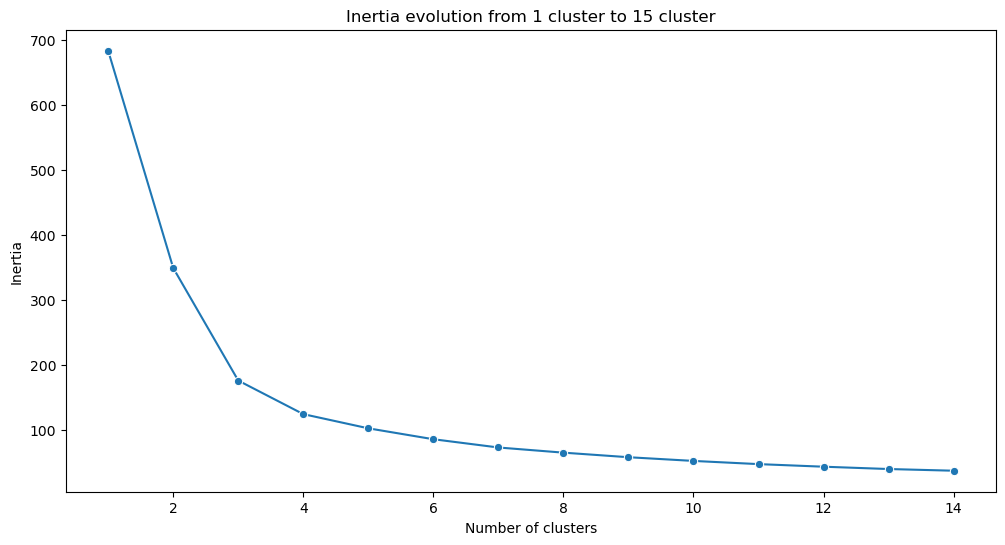

In [35]:
max_k = 15
inertia = []

for k in range(1, max_k):
    inertia.append(KMeans(n_clusters=k, n_init=10).fit(df_cl).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [36]:
df_kmeans = KMeans(n_clusters=4).fit(df_cl)

/Users/nursahkurt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
